# Objective 1

In [ ]:
import numpy as np

# Load the dataset
with open('/content/IR-assignment-2-data (2).txt') as f:
    data = f.readlines()

# Parse the data and store it in a list
data = [line.strip().split(' ') for line in data]


In [ ]:
# Filter out the queries with qid:4
data = [d for d in data if d[1]==('qid:4')]

# Calculate the DCG score for each query-url pair
def dcg(rel):
    rel = [float(r) for r in rel] # convert to float
    return rel[0] + sum([rel[i] / np.log2(i+1) for i in range(1, min(50, len(rel)))])

dcgs = [(q[2], q[1], dcg([float(q[0])] + [float(x.split(':')[1]) for x in q[3:] if ':' in x])) for q in data]


In [ ]:
print(dcgs)

[('1:3', 'qid:4', 667.6889662786776), ('1:3', 'qid:4', 1038.8407832322607), ('1:3', 'qid:4', 679.7626526472976), ('1:3', 'qid:4', 1071.903344254697), ('1:3', 'qid:4', 474.12766399394314), ('1:3', 'qid:4', 957.8804798268385), ('1:3', 'qid:4', 326.74317132597713), ('1:3', 'qid:4', 473.8729479280592), ('1:3', 'qid:4', 717.6751359323216), ('1:3', 'qid:4', 473.12766399394314), ('1:3', 'qid:4', 298.79215051066757), ('1:2', 'qid:4', 229.154971193841), ('1:3', 'qid:4', 344.72110211331034), ('1:2', 'qid:4', 747.2240764033078), ('1:2', 'qid:4', 523.6410470809221), ('1:3', 'qid:4', 296.7022117293507), ('1:3', 'qid:4', 520.6250883543369), ('1:2', 'qid:4', 281.6857137567618), ('1:3', 'qid:4', 125.87848950763058), ('1:3', 'qid:4', 350.91570192348183), ('1:3', 'qid:4', 298.24718103141726), ('1:3', 'qid:4', 258.70356306256275), ('1:3', 'qid:4', 513.4941904612517), ('1:3', 'qid:4', 168.0697219829787), ('1:2', 'qid:4', 170.8897963378823), ('1:3', 'qid:4', 137.8487087560142), ('1:3', 'qid:4', 493.3568719

In [ ]:
# Save the query-url pairs in order of maximum DCG to a file
with open('mslr-web10k-qid4-maxdcg.txt', 'w') as f:
    for q in dcgs:
        f.write(q[0] + ' ' + q[1] + '\n')

In [ ]:
# Sort the query-url pairs in descending order based on DCG scores
dcgs = sorted(dcgs, reverse=True, key=lambda x: x[2])

num_pairs = len(dcgs)
print(f'Number of query-url pairs that could be made: {num_pairs}')
print("")
# Print the top 10 query-url pairs based on DCG scores
for i in range(10):
    print(dcgs[i][1], dcgs[i][2])

Number of query-url pairs that could be made: 103

qid:4 1812.322424709528
qid:4 1596.3435195983009
qid:4 1434.5385164475636
qid:4 1071.903344254697
qid:4 1038.8407832322607
qid:4 1038.6311453498322
qid:4 957.8804798268385
qid:4 926.4566974220006
qid:4 901.6613674958148
qid:4 810.8087406020202


# Objective 2

In [ ]:
import numpy as np


# Load the data
with open('/content/IR-assignment-2-data (2).txt') as f:
    lines = f.readlines()




In [ ]:
def dcg(relevance, k):
    r = relevance[:k]
    return np.sum(np.divide(np.power(2, r) - 1, np.log2(np.arange(2, len(r) + 2))))

def idcg(relevance, k):
    r_sorted = sorted(relevance, reverse=True)
    return dcg(r_sorted, k)

def ndcg(relevance, k):
    return dcg(relevance, k) / idcg(relevance, k)


In [ ]:
import re

# Split the lines using regular expression
data_split = [re.split(r'\s+', line.strip()) for line in data]

# Extract the relevance scores
relevance = [int(line[0]) for line in data_split if line[0].isdigit()]


In [ ]:
# Compute nDCG@50
ndcg_50 = ndcg(relevance[:50], 50)
print(f"nDCG@50: {ndcg_50:.3f}")

# Compute nDCG for the entire dataset
ndcg_all = ndcg(relevance, len(relevance))
print(f"nDCG for the entire dataset: {ndcg_all:.3f}")


nDCG@50: 0.485
nDCG for the entire dataset: 0.766


# Objective 3

In [1]:
import numpy as np
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load data from the txt file
with open('/content/IR-assignment-2-data (2).txt') as f:
    data = [line.strip().split() for line in f]



In [5]:

# Filter data to only include query qid:4 and relevant documents
relevant_data = [line for line in data if line[1] == 'qid:4' and line[3] != '0']

# Sort relevant_data by feature 75 in descending order
relevant_data_sorted = sorted(relevant_data, key=lambda x: float(x[76].split(':')[1]), reverse=True)


In [ ]:
relevant_data_sorted

In [11]:
# Calculate precision and recall at different thresholds
y_true = [int(line[3].split(":")[1]) for line in relevant_data_sorted]
y_score = [float(line[76].split(":")[1]) for line in relevant_data_sorted]
y_true_binary = [1 if int(line[3].split(":")[1]) > 0 else 0 for line in relevant_data_sorted]

precision, recall, _ = precision_recall_curve(y_true_binary, y_score)

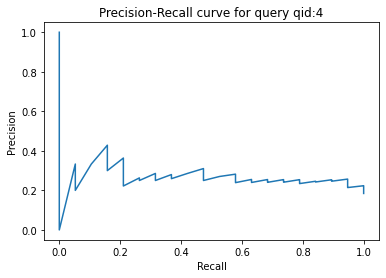

In [12]:
# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for query qid:4')
plt.show()